In [60]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('data/complete_dataset.csv')

In [62]:
df.head(10)

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892
5,5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430215
6,6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535874
7,7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541564
8,8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090338
9,9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962099


In [63]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Creating 'Population' and 'Income' dataframe from the main dataframe

In [64]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [65]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [66]:
bangalore_population.to_csv('data/population_dataset.csv')

In [67]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [68]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [69]:
bangalore_income.to_csv('data/income_dataset.csv')

In [70]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.9623396203125 77.601752946875


In [71]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [72]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [73]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [74]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [75]:
borough_colors

{'Central': '#FE7FA3',
 'Eastern': '#AA2367',
 'NorthEastern': '#FF8698',
 'Northern': '#FF156B',
 'SouthEastern': '#1C1941',
 'Southern': '#CF36C3',
 'SouthernSuburbs': '#8FD9E6',
 'Western': '#EE48FA'}

In [76]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [77]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [78]:
bangalore_map

# Exploring bangalore Neighborhoods using FourSquare API

In [79]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [80]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [81]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  562


In [82]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant
4,Domlur,Central,12.960992,77.638726,Lavonne,12.963909,77.638579,Café


In [83]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       102
Coffee Shop              31
Bakery                   23
Pizzeria                 21
Ice Cream Parlor         21
Fast Food Restaurant     19
Chinese Restaurant       19
Café                     17
Department Store         16
Hotel                    11
Name: Neighborhood, dtype: int64

In [84]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  124


### Getting number of venues per neighborhood

In [85]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [86]:
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             4
        Domlur                     14
        Indiranagar                57
        Jeevanbheemanagar           4
        Malleswaram                 6
...                               ...
Western Nagarbhavi                  7
        Nandini Layout              2
        Nayandahalli                6
        Rajarajeshwari Nagar        9
        Vijayanagar                 3

[62 rows x 1 columns]

In [87]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [88]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [89]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,4
1,Central,Domlur,14
2,Central,Indiranagar,57
3,Central,Jeevanbheemanagar,4
4,Central,Malleswaram,6
...,...,...,...
57,Western,Nagarbhavi,7
58,Western,Nandini Layout,2
59,Western,Nayandahalli,6
60,Western,Rajarajeshwari Nagar,9


C:\Users\pallavi\AppData\Local\Temp\ipykernel_13376\917069248.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)


[Text(0, 0, 'Cantonment area'),
 Text(1, 0, 'Domlur'),
 Text(2, 0, 'Indiranagar'),
 Text(3, 0, 'Jeevanbheemanagar'),
 Text(4, 0, 'Malleswaram'),
 Text(5, 0, 'Pete area'),
 Text(6, 0, 'Rajajinagar'),
 Text(7, 0, 'Sadashivanagar'),
 Text(8, 0, 'Seshadripuram'),
 Text(9, 0, 'Shivajinagar'),
 Text(10, 0, 'Ulsoor'),
 Text(11, 0, 'Vasanth Nagar'),
 Text(12, 0, 'Bellandur'),
 Text(13, 0, 'CV Raman Nagar'),
 Text(14, 0, 'Hoodi'),
 Text(15, 0, 'Krishnarajapuram'),
 Text(16, 0, 'Mahadevapura'),
 Text(17, 0, 'Marathahalli'),
 Text(18, 0, 'Varthur'),
 Text(19, 0, 'Whitefield'),
 Text(20, 0, 'Banaswadi'),
 Text(21, 0, 'HBR Layout'),
 Text(22, 0, 'Horamavu'),
 Text(23, 0, 'Kammanahalli'),
 Text(24, 0, 'Lingarajapuram'),
 Text(25, 0, 'Ramamurthy Nagar'),
 Text(26, 0, 'Hebbal'),
 Text(27, 0, 'Jalahalli'),
 Text(28, 0, 'Mathikere'),
 Text(29, 0, 'Peenya'),
 Text(30, 0, 'R. T. Nagar'),
 Text(31, 0, 'Yelahanka'),
 Text(32, 0, 'Yeshwanthpur'),
 Text(33, 0, 'BTM Layout'),
 Text(34, 0, 'Bommanahalli'),
 Tex

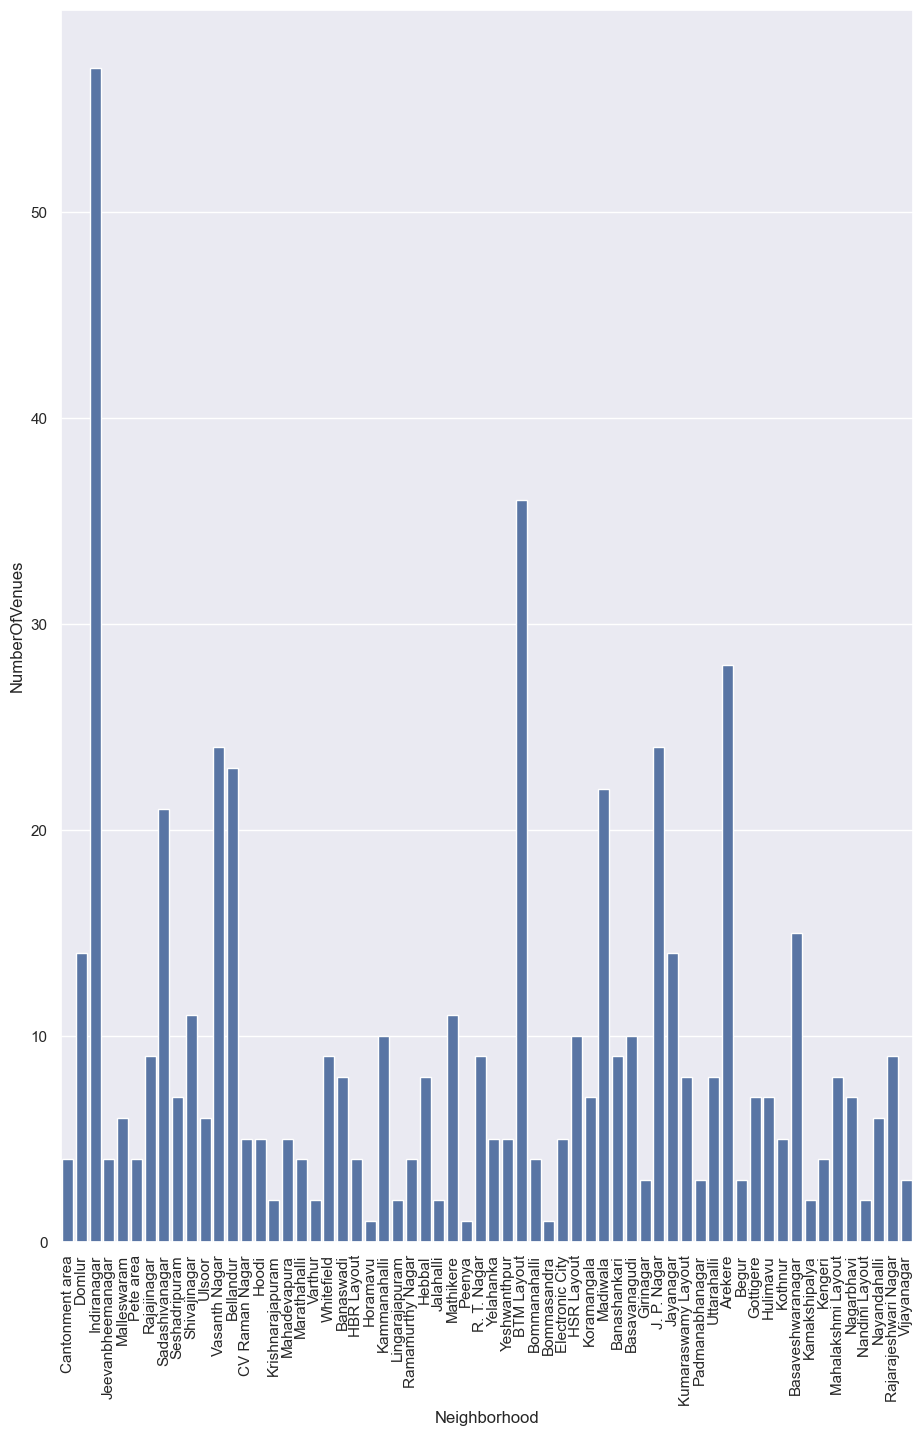

In [90]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that inderanagar has most number of venues and soo on...

## Exploring Whitefield venues

In [91]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
213,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
214,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
215,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
216,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
217,Whitefield,Eastern,12.9698,77.7499,Stoner,12.968464,77.749499,Ice Cream Parlor
218,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
219,Whitefield,Eastern,12.9698,77.7499,Fabindia,12.972156,77.750447,Market
220,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
221,Whitefield,Eastern,12.9698,77.7499,Calvin's,12.973117,77.749514,Café


# One hot encoding for letting us to compare different venues based on some common scale


In [92]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [93]:
bangalore_venues_onehot

,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts and Entertainment,Venue Category_Asian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bar,Venue Category_Bengali Restaurant,Venue Category_Bistro,Venue Category_Bookstore,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Theme Restaurant,Venue Category_Toll Plaza,Venue Category_Travel Agency,Venue Category_Travel and Transportation,Venue Category_Udupi Restaurant,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [94]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts and Entertainment,Venue Category_Asian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bar,Venue Category_Bengali Restaurant,Venue Category_Bistro,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Theme Restaurant,Venue Category_Toll Plaza,Venue Category_Travel Agency,Venue Category_Travel and Transportation,Venue Category_Udupi Restaurant,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Arekere,0.0,0.000000,0.0,0.0,0.0,0.000000,0.035714,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,BTM Layout,0.0,0.000000,0.0,0.0,0.0,0.027778,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0
2,Banashankari,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,Banaswadi,0.0,0.000000,0.0,0.0,0.0,0.125000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0
4,Basavanagudi,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Vasanth Nagar,0.0,0.041667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0
58,Vijayanagar,0.0,0.000000,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
59,Whitefield,0.0,0.000000,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
60,Yelahanka,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [95]:
number_of_top_venues = 5

In [96]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Arekere ---------


                                  Venue  Frequency
0      Venue Category_Indian Restaurant       0.21
1  Venue Category_Sporting Goods Retail       0.14
2     Venue Category_Mughlai Restaurant       0.07
3               Venue Category_Pizzeria       0.07
4       Venue Category_Department Store       0.07


--------- BTM Layout ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.19
1           Venue Category_Snack Place       0.08
2           Venue Category_Coffee Shop       0.08
3  Venue Category_Fast Food Restaurant       0.08
4      Venue Category_Ice Cream Parlor       0.08


--------- Banashankari ---------
                                    Venue  Frequency
0              Venue Category_Coffee Shop       0.22
1        Venue Category_Indian Restaurant       0.11
2  Venue Category_North Indian Restaurant       0.11
3               Venue Category_Shoe Store       0.11
4                 Venue Category_Pizzeria       0.11


------

Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [97]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [98]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Retail,Venue Category_Mughlai Restaurant,Venue Category_Pizzeria,Venue Category_Department Store,Venue Category_Night Club,Venue Category_Neighborhood,Venue Category_Fuel Station,Venue Category_Bus Line,Venue Category_Burrito Restaurant
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Coffee Shop,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Parlor,Venue Category_Chinese Restaurant,Venue Category_Restaurant,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Sandwich Spot,Venue Category_Pizzeria
2,Banashankari,Venue Category_Coffee Shop,Venue Category_Indian Restaurant,Venue Category_North Indian Restaurant,Venue Category_Shoe Store,Venue Category_Pizzeria,Venue Category_Fried Chicken Joint,Venue Category_Clothing Store,Venue Category_Breakfast Spot,Venue Category_Andhra Restaurant,Venue Category_Park
3,Banaswadi,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Juice Bar,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Bakery,Venue Category_Bookstore,Venue Category_Park,Venue Category_Music Venue,Venue Category_Neighborhood,Venue Category_Night Club
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Jewelry Store,Venue Category_Travel Agency,Venue Category_Restaurant,Venue Category_Convenience Store,Venue Category_Café,Venue Category_Hookah Bar,Venue Category_Park,Venue Category_Neighborhood,Venue Category_Night Club


In [99]:
neighborhoods_venues_sorted.shape

(62, 11)

## Next challenge is to find the optimal k value for clustering and we do it using the elbow method

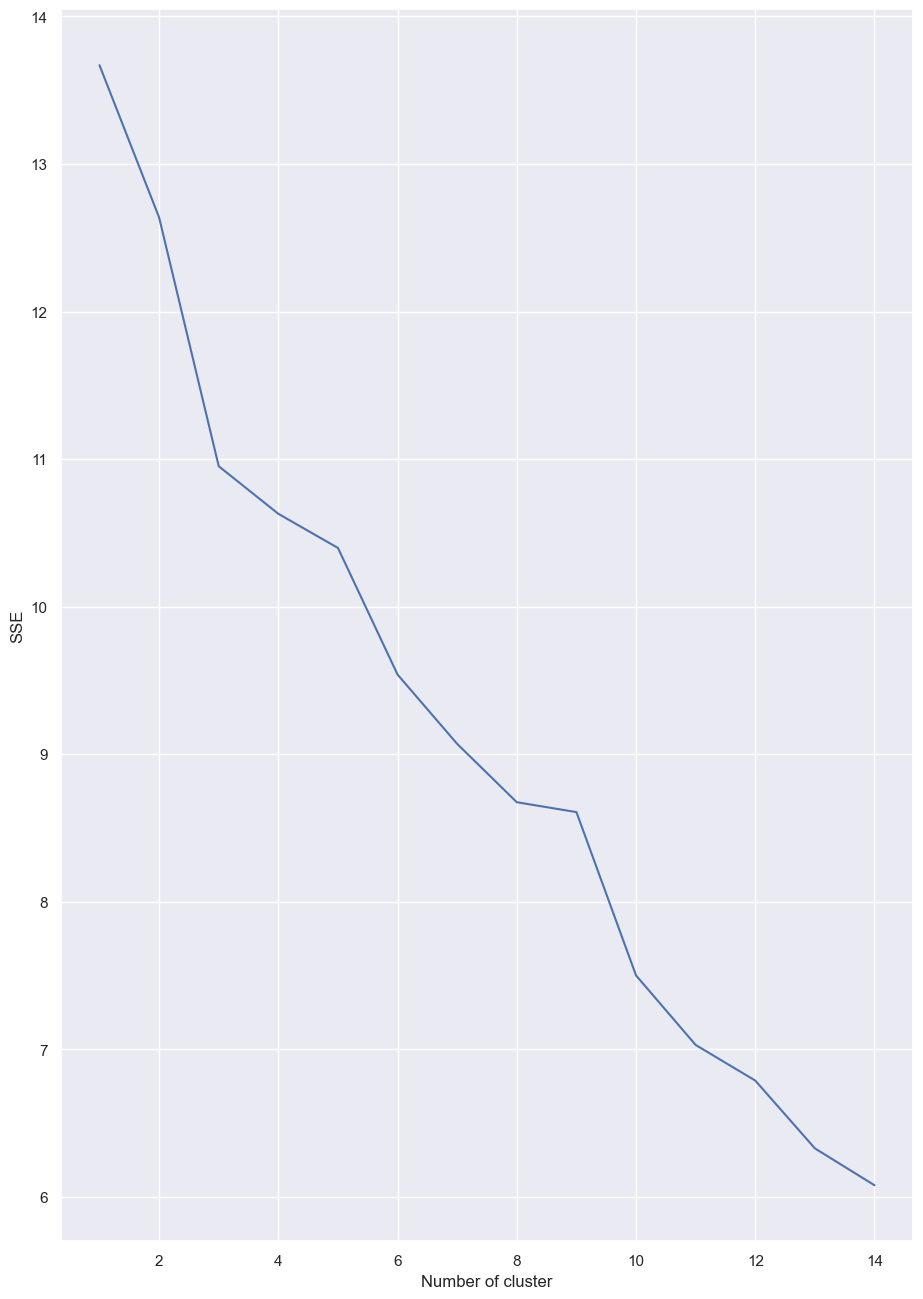

In [100]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### From the above graph, we can see the optimal value for cluster is 5.

In [101]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [102]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(n_clusters=5, random_state=0)

In [103]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [104]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     1
1    16
2    27
3     4
4    14
Name: Neighborhood, dtype: int64

In [105]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_Andhra Restaurant',
       'Venue Category_Art Museum', 'Venue Category_Arts and Entertainment',
       'Venue Category_Asian Restaurant', 'Venue Category_BBQ Joint',
       'Venue Category_Bakery', 'Venue Category_Bar',
       'Venue Category_Bengali Restaurant', 'Venue Category_Bistro',
       ...
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Theme Restaurant',
       'Venue Category_Toll Plaza', 'Venue Category_Travel Agency',
       'Venue Category_Travel and Transportation',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegan and Vegetarian Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Cluster'],
      dtype='object', length=126)

In [106]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [107]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tex-Mex Restaurant,Venue Category_Theme Restaurant,Venue Category_Toll Plaza,Venue Category_Travel Agency,Venue Category_Travel and Transportation,Venue Category_Udupi Restaurant,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Retail,Venue Category_Mughlai Restaurant,Venue Category_Pizzeria,Venue Category_Department Store,Venue Category_Night Club,Venue Category_Neighborhood,Venue Category_Fuel Station,Venue Category_Bus Line,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Coffee Shop,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Parlor,Venue Category_Chinese Restaurant,Venue Category_Restaurant,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Sandwich Spot,...,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,1
2,Banashankari,Venue Category_Coffee Shop,Venue Category_Indian Restaurant,Venue Category_North Indian Restaurant,Venue Category_Shoe Store,Venue Category_Pizzeria,Venue Category_Fried Chicken Joint,Venue Category_Clothing Store,Venue Category_Breakfast Spot,Venue Category_Andhra Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4
3,Banaswadi,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Juice Bar,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Bakery,Venue Category_Bookstore,Venue Category_Park,Venue Category_Music Venue,Venue Category_Neighborhood,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,2


In [108]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [109]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [110]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       

In [111]:
map_clusters

## Finding similar locations based on user input (recommending location)
#### We need to analyze factors such as population and Income to recommend.

In [112]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [113]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [114]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [115]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [116]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts and Entertainment,Venue Category_Asian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bar,Venue Category_Bengali Restaurant,Venue Category_Bistro,...,Venue Category_Tex-Mex Restaurant,Venue Category_Theme Restaurant,Venue Category_Toll Plaza,Venue Category_Travel Agency,Venue Category_Travel and Transportation,Venue Category_Udupi Restaurant,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Cluster
0,Arekere,0.0,0.0,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


#### recommending Veg restaurants

In [117]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts and Entertainment,Venue Category_Asian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bar,Venue Category_Bengali Restaurant,Venue Category_Bistro,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Theme Restaurant,Venue Category_Toll Plaza,Venue Category_Travel Agency,Venue Category_Travel and Transportation,Venue Category_Udupi Restaurant,Venue Category_Vegan and Vegetarian Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store
0,Arekere,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BTM Layout,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,0,0
2,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Banaswadi,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Basavanagudi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [118]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

KeyError: 'Venue Category_Vegetarian / Vegan Restaurant'

In [ ]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [ ]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [ ]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Arekere,0
1,BTM Layout,2
2,Banashankari,0
3,Banaswadi,1
4,Basavanagudi,0


In [ ]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [ ]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arekere,0,1.0
1,BTM Layout,2,0.0
2,Banashankari,0,1.0
3,Banaswadi,1,0.5
4,Basavanagudi,0,1.0
5,Basaveshwaranagar,0,1.0
6,Begur,0,1.0
7,Bellandur,0,1.0
8,Bommanahalli,0,1.0
9,Bommasandra,0,1.0


In [ ]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

### Building a target neighborhood by providing a sample restaurant : say ' Whitefield '

In [ ]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [ ]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,574,Whitefield,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
1,575,Whitefield,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
2,576,Whitefield,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,577,Whitefield,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,578,Whitefield,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,579,Whitefield,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
6,580,Whitefield,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café
7,581,Whitefield,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
8,582,Whitefield,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Café,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Swiss Restaurant,...,0.0,0.0,4,Eastern,12.9698,77.7499,burgundy restaurant,12.966812,77.751380,Swiss Restaurant


In [ ]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [ ]:
target_cluster

4

In [ ]:
print("The target cluster is : ",target_cluster)

The target cluster is :  4


In [ ]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
104,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,4,SouthernSuburbs,12.8788,77.6377,Pandit Ji Sweets And Namkeen,12.878766,77.637955,Indian Sweet Shop
105,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,4,SouthernSuburbs,12.8788,77.6377,Lelijiye,12.879540,77.639470,Clothing Store
106,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,4,SouthernSuburbs,12.8788,77.6377,Show Off Bake n’ Juice,12.879472,77.639678,Bakery
107,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,0.0,0.0,4,SouthernSuburbs,12.8788,77.6377,Divya Joythi Royal County - Badminton Court,12.875597,77.640823,Stadium
207,Hulimavu,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Badminton Court,Venue Category_South Indian Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Breakfast Spot,Venue Category_Juice Bar,Venue Category_Hotel Bar,Venue Category_French Restaurant,...,0.0,0.0,4,SouthernSuburbs,12.8789,77.6090,Simply Indian,12.879523,77.609748,Indian Restaurant


In [ ]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 51 neighborhoods which has similar characteristics to Whitefield.


In [ ]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,104,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,4,SouthernSuburbs,12.8788,77.6377,Pandit Ji Sweets And Namkeen,12.878766,77.637955,Indian Sweet Shop
1,105,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,4,SouthernSuburbs,12.8788,77.6377,Lelijiye,12.879540,77.639470,Clothing Store
2,106,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,4,SouthernSuburbs,12.8788,77.6377,Show Off Bake n’ Juice,12.879472,77.639678,Bakery
3,107,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,...,0.0,0.0,4,SouthernSuburbs,12.8788,77.6377,Divya Joythi Royal County - Badminton Court,12.875597,77.640823,Stadium
4,207,Hulimavu,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Badminton Court,Venue Category_South Indian Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Breakfast Spot,Venue Category_Juice Bar,Venue Category_Hotel Bar,...,0.0,0.0,4,SouthernSuburbs,12.8789,77.6090,Simply Indian,12.879523,77.609748,Indian Restaurant


In [ ]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

C:\Users\coreML\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### Now we need to create ranking by combining population and income factors as well?

In [ ]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [ ]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,Pandit Ji Sweets And Namkeen,12.878766,77.637955,Indian Sweet Shop,594887,0.604797,61640.098297,0.953525,0,1.0
1,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,Lelijiye,12.879540,77.639470,Clothing Store,594887,0.604797,61640.098297,0.953525,0,1.0
2,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,Show Off Bake n’ Juice,12.879472,77.639678,Bakery,594887,0.604797,61640.098297,0.953525,0,1.0
3,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,Venue Category_Clothing Store,Venue Category_Yoga Studio,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,Divya Joythi Royal County - Badminton Court,12.875597,77.640823,Stadium,594887,0.604797,61640.098297,0.953525,0,1.0
4,Hulimavu,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Badminton Court,Venue Category_South Indian Restaurant,Venue Category_Gym / Fitness Center,Venue Category_Breakfast Spot,Venue Category_Juice Bar,Venue Category_Hotel Bar,Venue Category_French Restaurant,...,Simply Indian,12.879523,77.609748,Indian Restaurant,949207,0.965020,33486.513518,0.518010,0,1.0


In [ ]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [ ]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,13.006615,77.564158,Indian Restaurant,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
1,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,13.000799,77.563924,Breakfast Spot,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
2,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,13.006587,77.564354,Ice Cream Shop,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
3,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,13.007511,77.563738,Bakery,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674
4,Malleswaram,Venue Category_Ice Cream Shop,Venue Category_Breakfast Spot,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Food Court,Venue Category_Food & Drink Shop,Venue Category_Flower Shop,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,...,13.001860,77.567340,Ice Cream Shop,893629,0.908516,53270.063892,0.824047,0,1.0,0.842674


In [ ]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [ ]:
top3_df = pd.DataFrame(top3).reset_index()

In [ ]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Begur,Venue Category_Bakery,Venue Category_Indian Sweet Shop,Venue Category_Stadium,[0.7361321887351776]
1,Hulimavu,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Badminton Court,[0.7638135476902764]
2,Kamakshipalya,Venue Category_South Indian Restaurant,Venue Category_Yoga Studio,Venue Category_Food Truck,[0.80418735993893]


#### Here, according the data, we see that 'Begur,Hulimavu and kamakshipalya' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !
#### Here our model will recommend these neighborneeds and top 3 common venues to visit.

# Thank you for reviewing !